# What is the most profitable way to sell cars online?

- Fair price for each model of car
- Saturation in the market
- Average cost per car brand

The Vehicle Manufacturer with the largest number of 
- White Vehicles listed is Ford with 5468 listings.
- Chevrolet with 3110 White Vehicles Listed.
- Toyota with 1167 White Vehicles Listed. (Japanese Owned)

In [66]:
# dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
vehicle_listing_data = os.path.join("..", "output_data", "vehicles_cleaned.csv")
vehicle_listing_df = pd.read_csv(vehicle_listing_data)

vehicle_sold_data = os.path.join("..", "output_data", "used_cars_sold_cleaned.csv")
vehicle_sold_df = pd.read_csv(vehicle_sold_data)

In [68]:
vehicle_listing_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,...,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,...,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,...,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,...,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,...,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [69]:
# Remove values greater than or lower than 3 standard deviation
vehicle_listing_df = vehicle_listing_df[~(np.abs(vehicle_listing_df.price-vehicle_listing_df.price.mean()) > (3*vehicle_listing_df.price.std()))]

In [70]:
# Calculating the number of cars listed
num_cars = vehicle_listing_df.groupby("manufacturer")["Unnamed: 0"].count()
num_cars = num_cars.sort_values(ascending=False)
num_cars.rename("count").reset_index()

,manufacturer,count
0,ford,13699
1,chevrolet,10370
2,toyota,6492
3,honda,4598
4,nissan,3901
5,gmc,2906
6,jeep,2812
7,ram,2704
8,dodge,2269
9,bmw,2064


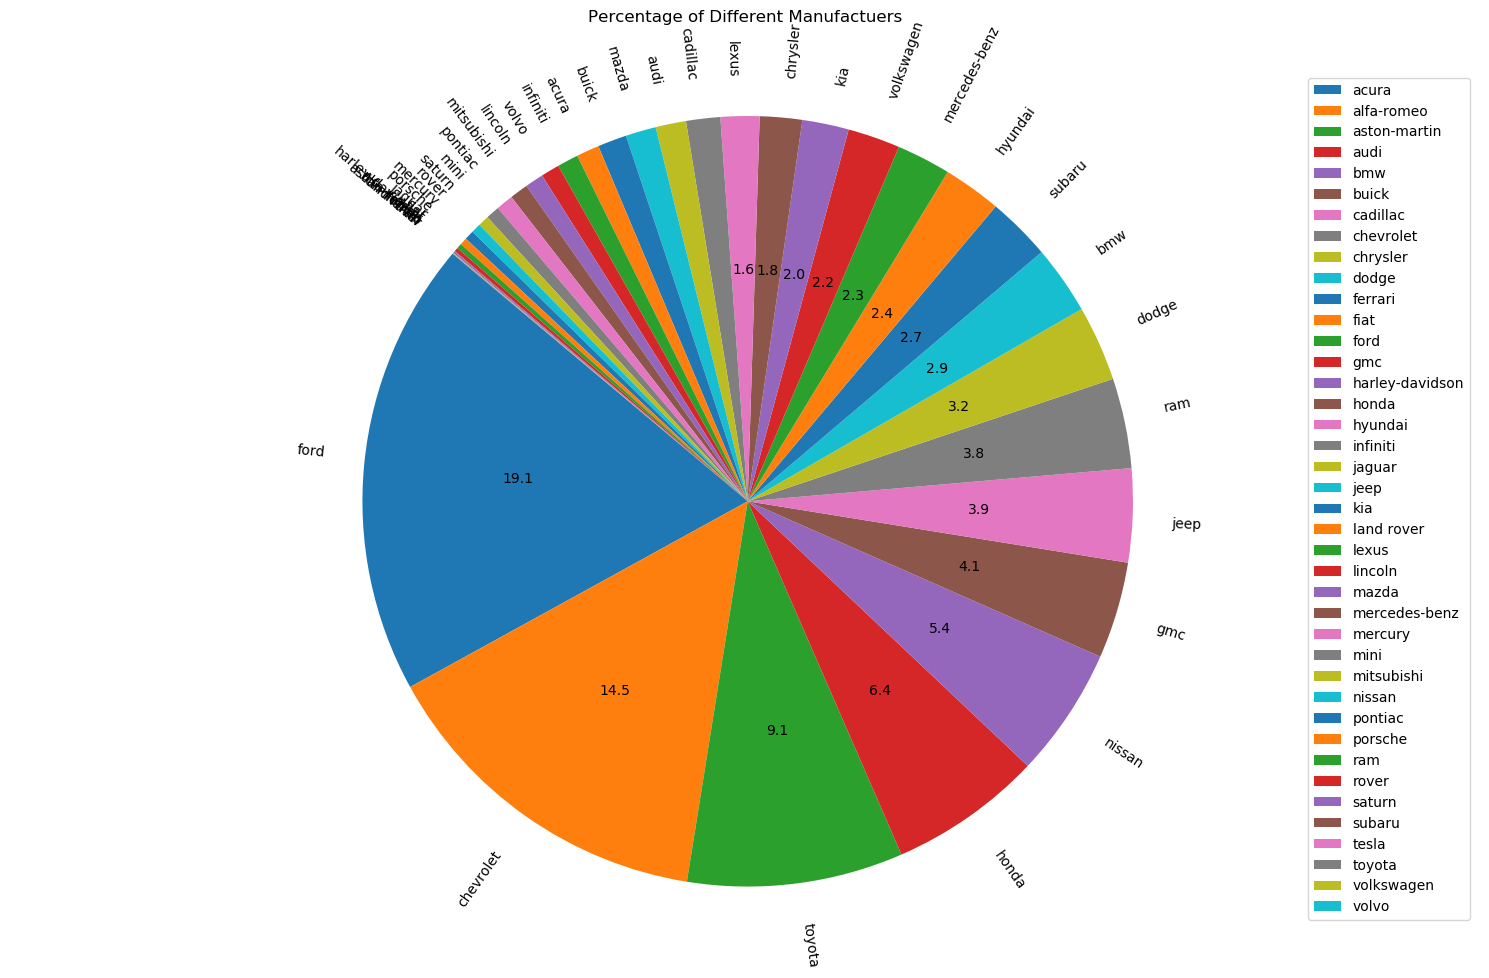

In [114]:
num_cars.plot(kind="pie", rotatelabels=18, figsize=(15,10), autopct=lambda p: format(p, ".1f") if p > 1.5 else None,
             shadow = False, startangle = 140, textprops={'fontsize': 10})

plt.title("Percentage of Different Manufactuers", pad = 40)
plt.ylabel("")

plt.legend(labels, loc = "lower right")

plt.axis("equal")
plt.tight_layout()

# Observation
* It can be seen that fords and chervolet are the most listed cars, with them making up 19.1% and 14.5% of the listed used cars 

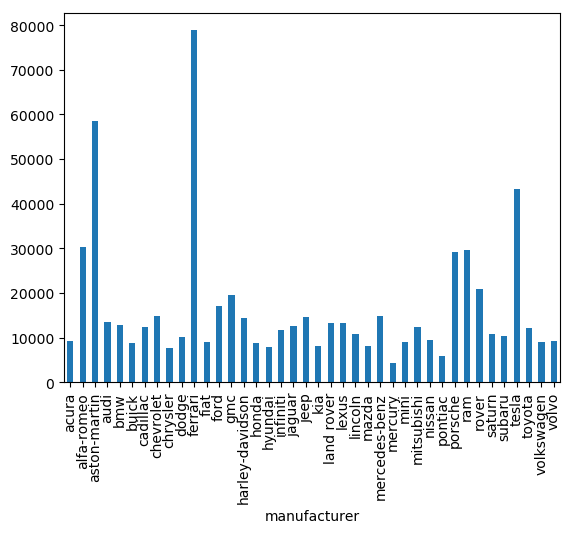

In [101]:
# Average price per car type
average_listing_price = vehicle_listing_df.groupby(["manufacturer"])["price"].mean().sort_index()
average_listing_price.plot.bar()

In [118]:
average_listing_price[["ford", "chevrolet", "toyota"]].reset_index()

,manufacturer,price
0,ford,17025.089496
1,chevrolet,14904.817261
2,toyota,12042.044362


In [117]:
# Top 5 average costing cars
top_avg_list_price = average_listing_price.sort_values(ascending=False).reset_index()
top_avg_list_price.rename(columns = {"price":"average price"}, inplace=True)
top_avg_list_price.head(5)

,manufacturer,average price
0,ferrari,78864.333333
1,aston-martin,58483.750000
2,tesla,43248.794118
3,alfa-romeo,30372.764706
4,ram,29628.322485


In [116]:
# Bottom 5 average costing cars
bot_avg_list_price = average_listing_price.sort_values(ascending=True).reset_index()
bot_avg_list_price.rename(columns = {"price":"average price"}, inplace=True)
bot_avg_list_price.head(5)

,manufacturer,average price
0,mercury,4203.922261
1,pontiac,5784.547389
2,chrysler,7639.085039
3,hyundai,7888.753714
4,kia,8095.119201


# Observation

In [ ]:
# seems as though they hold their value pretty well